## Import Packages

In [1]:
from torch import *
from torchvision import *
import matplotlib.pyplot as plt
import numpy as np

## Load Pre-Trained VGG-19 Model

In [2]:
vgg = models.vgg19(pretrained=True)
vgg = vgg.cuda()
vgg.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

## Select Layer to Visualize

In [3]:
layer = list(vgg.features.modules())[6]

In [4]:
weights = layer.weight

In [5]:
print(weights.size())

torch.Size([128, 64, 3, 3])


## Permute Weights
PyTorch by default uses the channel-first convention. Simply permute the layers of the tensor to the desired configuration.

In [6]:
permuted = weights[0].permute(1,2,0)

In [7]:
permuted.size()

torch.Size([3, 3, 64])

## Store Filters as PIL Images


In [8]:
images = []
num_filters = permuted.size()[2]
for i in range(num_filters):
    im = transforms.ToPILImage()(permuted[:,:,i].cpu()).convert('RGB')
    images.append(im)

## Plot the filters in a grid

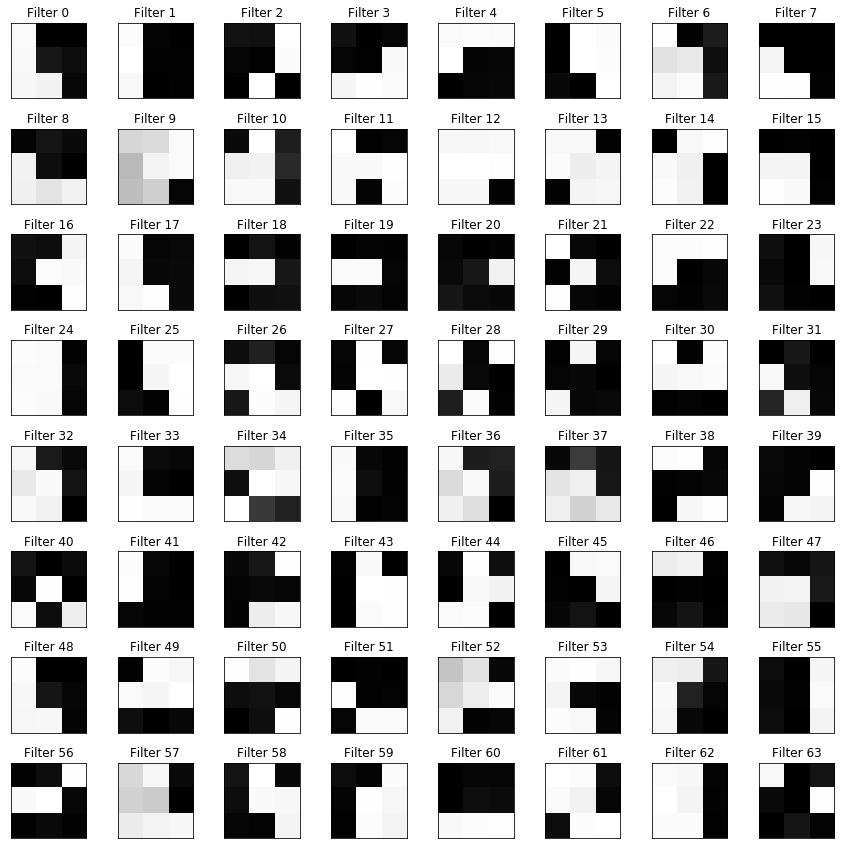

In [9]:
fig = plt.figure(figsize = (15,15))
ax=list()
dims = int(np.log2(num_filters))
dim2 = np.exp2(dims-(dims//2))
dim1 = np.exp2(dims//2)

for i in range(num_filters):
    ax.append(fig.add_subplot(dim1,dim2,i+1))
    ax[i].title.set_text('Filter ' + str(i))  
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].imshow(images[i])

plt.subplots_adjust(hspace = 0.4)
plt.show()
